In [21]:
import numpy as np
import matplotlib.pyplot as plt

import sensors as sn
import em_tools as em
import subspace_methods as sm

In [22]:
DIST_RATIO = 0.5

In [23]:
Num_sensors1 = 25
Num_emitters1 = 1
sample_size1 = 12

failing_sensors1 = np.arange(5)
gap_ratio1 = 0.5 * np.ones_like(failing_sensors1, dtype=np.float32)

theta1_rad = np.array([0.7]) # Угловые координаты источников (DoA) в радианах
theta1_deg = np.rad2deg(theta1_rad) # Угловые координаты источников (DoA) в градусах
P1 = 0.5 * np.eye(Num_emitters1, dtype=np.float64) # Ковариация сигналов
Q1 = 8.1 * np.eye(Num_sensors1, dtype=np.float64) # Ковариация шумов
A1 = (np.exp(-2j * np.pi * DIST_RATIO * np.arange(Num_sensors1).reshape(-1,1) * 
             np.sin(theta1_rad))) # Матрица векторов направленности
# Генерация сигналов, шумов и наблюдений
S1 = sn.gss(Num_emitters1, sample_size1, P1)
N1 = sn.gss(Num_sensors1, sample_size1, Q1)
X1 = (A1 @ S1.T + N1.T).T
X1_with_mv = sn.MCAR(X1, failing_sensors1, gap_ratio1)
R1 = sn.initial_Cov(X1_with_mv)
MUSIC_theta1 = sm.MUSIC_DoA(R1, Num_emitters1)

In [24]:
MUSIC_theta1

array([0.71558499])

In [25]:
sn.SNR(A1, P1, Q1, metrics = 'avg', scale = 'linear')

np.float64(1.54320987654321)

In [26]:
EM_theta1_rad, EM_P1, lhd_1, lhd_list1, angles_list1 = em.multistart_EM2(X1_with_mv, 
                                                                         Num_emitters1, 
                                                                         Q=Q1,
                                                                         theta_guess=MUSIC_theta1, 
                                                                         num_of_starts=1, 
                                                                         max_iter=25, 
                                                                         rtol=1e-6,
                                                                         reg_coef=1e-4)

0-th start
theta=[0.71558499],P=[[1.18642836e-07-1.98523347e-24j]]
Inital likelihood = -870.4011155592349
Iteration=1
likelihood is -870.3909570216754 on iteration 1.
Iteration=2
likelihood is -870.3814469960676 on iteration 2.
Iteration=3
likelihood is -870.3718879745038 on iteration 3.
Iteration=4
likelihood is -870.3599271548069 on iteration 4.
Iteration=5
likelihood is -870.3495571065747 on iteration 5.
Iteration=6
likelihood is -870.3389961994174 on iteration 6.
Iteration=7
likelihood is -870.3259350663559 on iteration 7.
Iteration=8
likelihood is -870.3138719805875 on iteration 8.
Iteration=9
likelihood is -870.3013999859351 on iteration 9.
Iteration=10
likelihood is -870.2884840541122 on iteration 10.
Iteration=11
likelihood is -870.2753401616369 on iteration 11.
Iteration=12
likelihood is -870.2614988339282 on iteration 12.
Iteration=13
likelihood is -870.2468265149835 on iteration 13.
Iteration=14
likelihood is -870.231163762605 on iteration 14.
Iteration=15
likelihood is -870

In [27]:
EM_theta1_rad, EM_P1

(array([0.69842676]), array([[0.00507021+0.j]]))

In [28]:
em.incomplete_lkhd(X1_with_mv, EM_theta1_rad, EM_P1, Q1), em.incomplete_lkhd(X1_with_mv, theta1_rad, P1, Q1)

(np.float64(-869.8749468847966), np.float64(-852.4011191641745))

In [29]:
lhd_list1 = np.array(lhd_list1)
angles_list1 = np.rad2deg(np.array(angles_list1))
x1 = np.arange(len(angles_list1))

In [30]:
Num_sensors2 = 25
Num_emitters2 = 1
sample_size2 = 11

failing_sensors2 = np.arange(8)
gap_ratio2 = 0.5 * np.ones_like(failing_sensors2, dtype=np.float32)

theta2_rad = np.array([0.7]) # Угловые координаты источников (DoA) в радианах
theta2_deg = np.rad2deg(theta2_rad) # Угловые координаты источников (DoA) в градусах
P2 = 0.5 * np.eye(Num_emitters2, dtype=np.float64) # Ковариация сигналов
Q2 = 6.1 * np.eye(Num_sensors2, dtype=np.float64) # Ковариация шумов
A2 = (np.exp(-2j * np.pi * DIST_RATIO * np.arange(Num_sensors2).reshape(-1,1) * 
             np.sin(theta2_rad))) # Матрица векторов направленности
# Генерация сигналов, шумов и наблюдений
S2 = sn.gss(Num_emitters2, sample_size2, P2)
N2 = sn.gss(Num_sensors2, sample_size2, Q2)
X2 = (A2 @ S2.T + N2.T).T
X2_with_mv = sn.MCAR(X2, failing_sensors2, gap_ratio2)
R2 = sn.initial_Cov(X2_with_mv)
MUSIC_theta2 = sm.MUSIC_DoA(R2, Num_emitters2)

In [31]:
MUSIC_theta2

array([0.72431164])

In [32]:
sn.SNR(A2, P2, Q2, metrics = 'avg', scale = 'linear')

np.float64(2.0491803278688523)

In [33]:
EM_theta2_rad, EM_P2, lhd_2, lhd_list2, angles_list2 = em.multistart_EM2(X2_with_mv, 
                                                                         Num_emitters2, 
                                                                         Q=Q2,
                                                                         theta_guess=MUSIC_theta2, 
                                                                         num_of_starts=1, 
                                                                         max_iter=25, 
                                                                         rtol=1e-6,
                                                                         reg_coef=1e-4)

0-th start
theta=[0.72431164],P=[[7.5917774e-08+4.13590306e-24j]]
Inital likelihood = -689.5792611594288
Iteration=1
likelihood is -689.5691426530494 on iteration 1.
Iteration=2
likelihood is -689.559471069902 on iteration 2.
Iteration=3
likelihood is -689.547368542294 on iteration 3.
Iteration=4
likelihood is -689.5344206660517 on iteration 4.
Iteration=5
likelihood is -689.5229973752716 on iteration 5.
Iteration=6
likelihood is -689.5113029767524 on iteration 6.
Iteration=7
likelihood is -689.4984381855377 on iteration 7.
Iteration=8
likelihood is -689.4850034148457 on iteration 8.
Iteration=9
likelihood is -689.4709289727629 on iteration 9.
Iteration=10
likelihood is -689.456208714154 on iteration 10.
Iteration=11
likelihood is -689.4410772514203 on iteration 11.
Iteration=12
likelihood is -689.4248467612551 on iteration 12.
Iteration=13
likelihood is -689.4072672592796 on iteration 13.
Iteration=14
likelihood is -689.3880254837283 on iteration 14.
Iteration=15
likelihood is -689.36

In [34]:
EM_theta2_rad, EM_P2

(array([0.70296731]), array([[0.0079432+0.j]]))

In [35]:
em.incomplete_lkhd(X2_with_mv, EM_theta2_rad, EM_P2, Q2), em.incomplete_lkhd(X2_with_mv, theta2_rad, P2, Q2)

(np.float64(-688.70352826266), np.float64(-673.6467390084401))

In [36]:
lhd_list2 = np.array(lhd_list2)
angles_list2 = np.rad2deg(np.array(angles_list2))
x2 = np.arange(len(angles_list2))

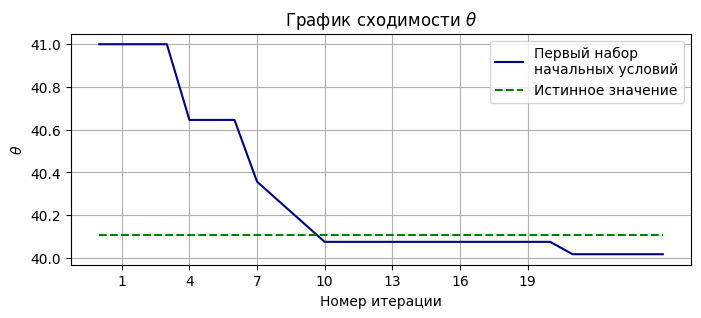

In [37]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График сходимости} \,\,\theta$')
plt.plot(x1, angles_list1,color='darkblue', label=f'Первый набор\nначальных условий')
plt.plot(x1, np.tile(theta1_deg, len(angles_list1)), color='green', label='Истинное значение', linestyle='--')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\theta$')
plt.xticks(np.arange(1,20,3))
plt.legend()
plt.grid()
plt.show()

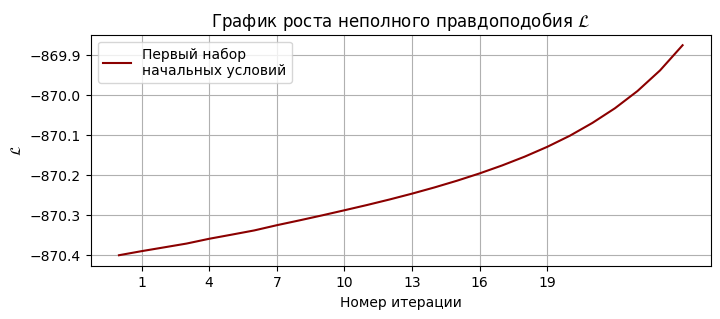

In [38]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График роста неполного правдоподобия} \,\,\mathcal{L}$')
plt.plot(x1, lhd_list1, color='darkred', label=f'Первый набор\nначальных условий')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\mathcal{L}$')
plt.xticks(np.arange(1,20,3))
plt.legend()
plt.grid()
plt.show()

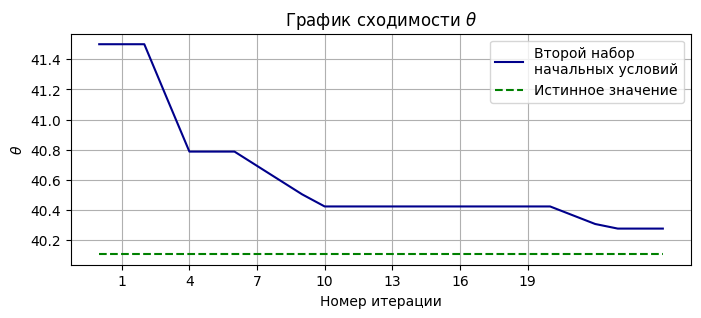

In [39]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График сходимости} \,\,\theta$')
plt.plot(x2, angles_list2,color='darkblue', label=f'Второй набор\nначальных условий')
plt.plot(x2, np.tile(theta2_deg, len(angles_list2)), color='green', label='Истинное значение', linestyle='--')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\theta$')
plt.xticks(np.arange(1,20,3))
plt.legend()
plt.grid()
plt.show()

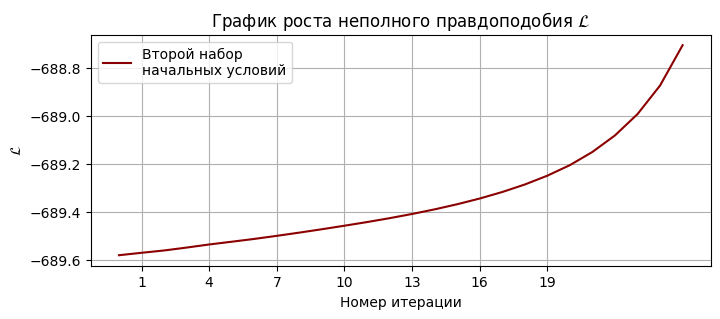

In [40]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График роста неполного правдоподобия} \,\,\mathcal{L}$')
plt.plot(x2, lhd_list2,color='darkred', label=f'Второй набор\nначальных условий')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\mathcal{L}$')
plt.xticks(np.arange(1,20,3))
plt.legend()
plt.grid()
plt.show()